In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))

In [2]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

In [4]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [5]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [6]:
picher.shape

(152, 22)

In [7]:
#2018년 연봉에 대한 정보
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

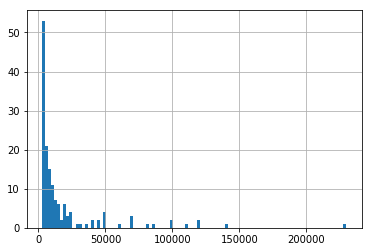

In [8]:
#2018년 연봉 분포
picher['연봉(2018)'].hist(bins=100)

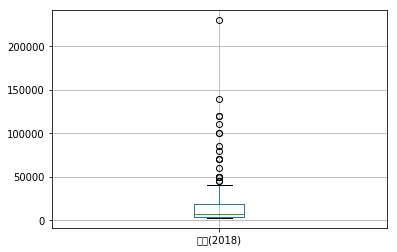

In [9]:
#2018년 연봉의 상자 그림
picher.boxplot(column=['연봉(2018)'])
#5억원 미만의 연봉이 일반적인 것으로 보임

In [10]:
import matplotlib as mpl
mpl.rc('font', family='NanumGothic') # 자신의 OS에 존재하는 한글 폰트를 선택합니다. 없는경우, 위의 링크에서 한글폰트 설치 후 실행합니다.

In [11]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

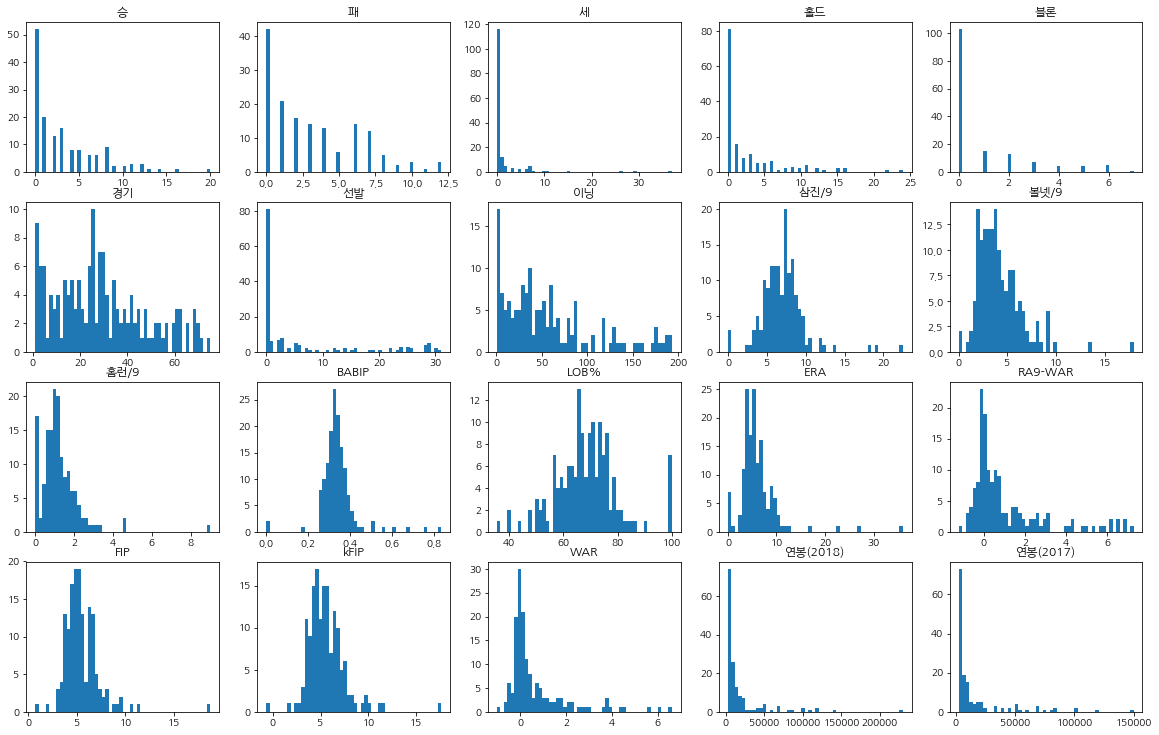

In [12]:
# 피처 각각에 대한 histogram 출력
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    
    # df의 column 개수 만큼의 subplot 출력
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
plot_hist_each_column(picher_features_df)

In [13]:
#피처 간의 단위가 다름. 이러한 데이터는 피처의 정규화 혹은 스케일링이 되어있지 않은 상태.

# <Step2. 예측> : 투수의 연봉 예측하기

### [피처들의 단위 맞춰주기 : 피처 스케일링]

In [14]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줌.
pd.options.mode.chained_assignment = None

In [15]:
#표준화는 정규 분포에서의 z-값을 구하는 과정과 동일
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [16]:
# 피처 각각에 대한 scaling 수행
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [17]:
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


### [피처들의 단위 맞춰주기 : one-hot-encoding]

In [18]:
#범주형 피처에는 원-핫 인코딩이라는 방법을 적용. 판다스에서는 get_dummies()라는 함수로 간단하게 원-핫 인코딩을 적용할 수 있음.

In [19]:
# team_encoding = pd.get_dummies(picher_df['팀명'])
# picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)
team_encoding.head(5)

NameError: name 'team_encoding' is not defined

In [ ]:
picher_df.head()

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

### 학습 데이터셋(학습 전용 데이터셋)과 모델의 테스트 데이터셋(테스트 전용 데이터셋)으로 데이터를 분리
### sklearn이라는 모듈의 train_test_split()함수로 이를 수행할 수 있다.
### 다음 코드 실행 결과, (X_train, y_train):(X_test, y_test) = 8:2의 비율로 총 4개의 데이터가 생성됨.

In [21]:
# 학습 데이터와 테스트 데이터로 분리
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [22]:
X_train

,BABIP,ERA,FIP,LOB%,RA9-WAR,WAR,kFIP,경기,볼넷/9,블론,삼진/9,선발,세,승,연봉(2017),이닝,팀명,패,홀드,홈런/9
94,0.544959,0.708951,-0.548806,-2.460666,-0.665457,-0.488518,-0.492924,-1.334367,1.086292,-0.543592,-0.105959,-0.624825,-0.306452,-0.827554,-0.463349,-1.052812,KIA,-1.008613,-0.585705,-1.189625
118,-0.016931,-0.611056,0.386499,1.404205,-0.410536,-0.564149,0.390203,-0.869767,-0.712407,-0.543592,-0.548038,-0.624825,-0.306452,-0.827554,-0.499282,-0.774469,KT,-1.008613,-0.364245,0.776804
109,-0.185498,0.399349,1.022507,-0.079629,-0.584099,-0.541460,1.056332,-1.231122,1.492586,-0.543592,-0.311084,-0.317136,-0.306452,-0.568731,-0.547193,-0.909664,삼성,-0.689219,-0.585705,0.324526
5,-0.578820,-0.721456,-0.580874,0.653661,2.963100,2.476226,-0.614039,-0.147055,-1.034057,-0.543592,0.130995,2.041816,-0.306452,1.243035,0.738417,2.048726,KT,2.185327,-0.585705,-0.088425
75,-0.084357,0.245749,-0.067792,-1.002712,-0.594947,-0.405324,-0.008466,-0.560033,0.679997,-0.543592,-0.219131,-0.624825,-0.306452,-0.568731,-0.459357,-0.853995,KIA,-0.689219,0.300137,-0.560368
6,0.241539,-0.231854,-0.869482,-0.338437,1.037633,2.423284,-0.886546,-0.198678,-1.338778,-0.543592,0.314899,1.836690,-0.306452,1.243035,-0.451371,1.674951,KT,2.824115,-0.364245,-0.373557
16,-0.151784,-0.167053,-0.383124,-0.433334,0.256598,1.122427,-0.351624,-0.198678,-0.174914,-0.543592,0.099165,1.939253,-0.306452,1.243035,0.738417,1.474146,LG,0.907751,-0.585705,-0.511207
1,-0.241686,-0.519855,-1.061888,-0.122764,3.114968,4.094734,-1.073265,0.059433,-0.987502,-0.543592,0.134531,2.349505,-0.098502,2.019505,1.337303,2.547755,LG,2.504721,-0.585705,-0.668521
117,0.859617,0.905752,2.112805,0.110164,-0.632914,-0.564149,2.136270,-1.282744,2.385587,-0.543592,-0.756699,-0.624825,-0.306452,-0.827554,-0.539208,-1.068717,LG,-1.008613,-0.585705,1.219251
137,-0.376540,-0.155053,0.514770,0.248195,-0.470198,-0.685159,0.652617,-0.250300,-0.627763,0.068452,-1.181094,-0.624825,-0.306452,-0.051084,-0.060099,-0.611439,롯데,-0.689219,-0.142784,0.472008


In [23]:
# 회귀 분석 계수를 학습 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

ValueError: could not convert string to float: '두산'

In [ ]:
# 학습된 계수 출력
print(lr.coef_)

In [ ]:
picher_df.columns

# <Step3. 평가> : 예측 모델 평가하기

### [어떤 피처가 가장 영향력이 강한 피처일까]

In [24]:
import statsmodels.api as sm

### 회귀 분석은 statsmodel 라이브러리 OLS 클래스로 실행 가능
### OLS 클래스의 summary() 함수를 사용하면 계수에 대한 자세한 분석 내용을 살펴볼 수 있다.
### 실행 결과에서 결정 계수(R-squared), 수정 결정 계수(Adj. R-squared)는 회귀 분석이 얼마나 잘 되었는지 평가하는 지표이며, '회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?'에 대한 점수이다. 이 점수들이 1에 가까울수록 데이터를 잘 설명하는 모델이다.
### F 통계량(F-statistic)은 회귀식의 유의성 검정에 사용되는 값으로 F 통계량에 대한 p-value인 Prob(F-statistic) 수치와 함께 봐야함.
### p-value가 0.05이하면, F 통계량이 유의한 의미를 가진다. (회귀 분석이 유의미한 결과를 가진다.)
### P>|t|라는 정보는 각 피처의 검정 통계량(t- statistic)이 얼마나 유의미한지에 대한 p-value를 나타내는 것.
### 아래 분석에서는 'WAR', '연봉(2017)', '한화' 3개 피처의 p-value가 0.05 미만으로 나타났기 때문에 회귀 분석에서 유의미한 피처들이라는 결론이 남.

In [25]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# 한글 출력을 위한 사전 설정 단계
mpl.rc('font', family='NanumGothic')
plt.rcParams['figure.figsize'] = [20, 16]

# 회귀 계수를 리스트로 반환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환
x_labels = model.params.index.tolist()

# 회귀 계수 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

### [예측 모델의 평가]
#### 수정 결정 계수(R2 score)를 sklean의 LinearRegression 클래스로 출력하자.

In [ ]:
# 학습 데이터와 테스트 데이터로 분리
X = picher_df[picher_df.columns.difference(['선수명', 'y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

##### R2 score - 회귀 분석 모델 평가

In [26]:
print(model.score(X_train, y_train)) # train R2 score 출력
print(model.score(X_test, y_test)) # test R2 score 출력

NameError: name 'model' is not defined

### 실행 결과의 각 값은 train 데이터셋과 test 데이터셋에 대한 평가 점수를 의미하며, 이 두 점수는 최대한 벌어지지 않는 것이 좋다.
### 만약 train score가 test score에 비해 높다면 과적합(overfit)이 발생한 것이다.

##### RMSE score - 회귀 분석 모델 평가
#### RMSE(Root Mean Squared Error) - 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것
#### 이 값이 높으면 높을수록 예측이 부정확하다는 것을 의미

In [27]:
# 회귀 분석 모델을 평가
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score 출력

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

### `[미니 퀴즈 - 3.1]`
- `Train score, 그리고 Test score의 차이점은 무엇일까요? 그리고 어떤 점수가 더 높아야 할까요?` 
    - 훈련 데이터셋을 통해 계산한 점수와 테스트 데이터셋을 통해 계산한 점수간에는 어떤 차이가 있는 것인지 적어 봅시다. 그리고 이 두 점수의 차이가 크다면, 어떤 상황을 의미하는 것인지 생각해 봅시다.

###  ===> Train score는 모델을 학습하고 Test score는 모델에 영향을 미치지 않는다. 두 점수의 차이가 크다면 모델에 과적합이 발생한 것이다.

### [피처들의 상관관계 분석] - heatmap 방식의 시각화를 사용

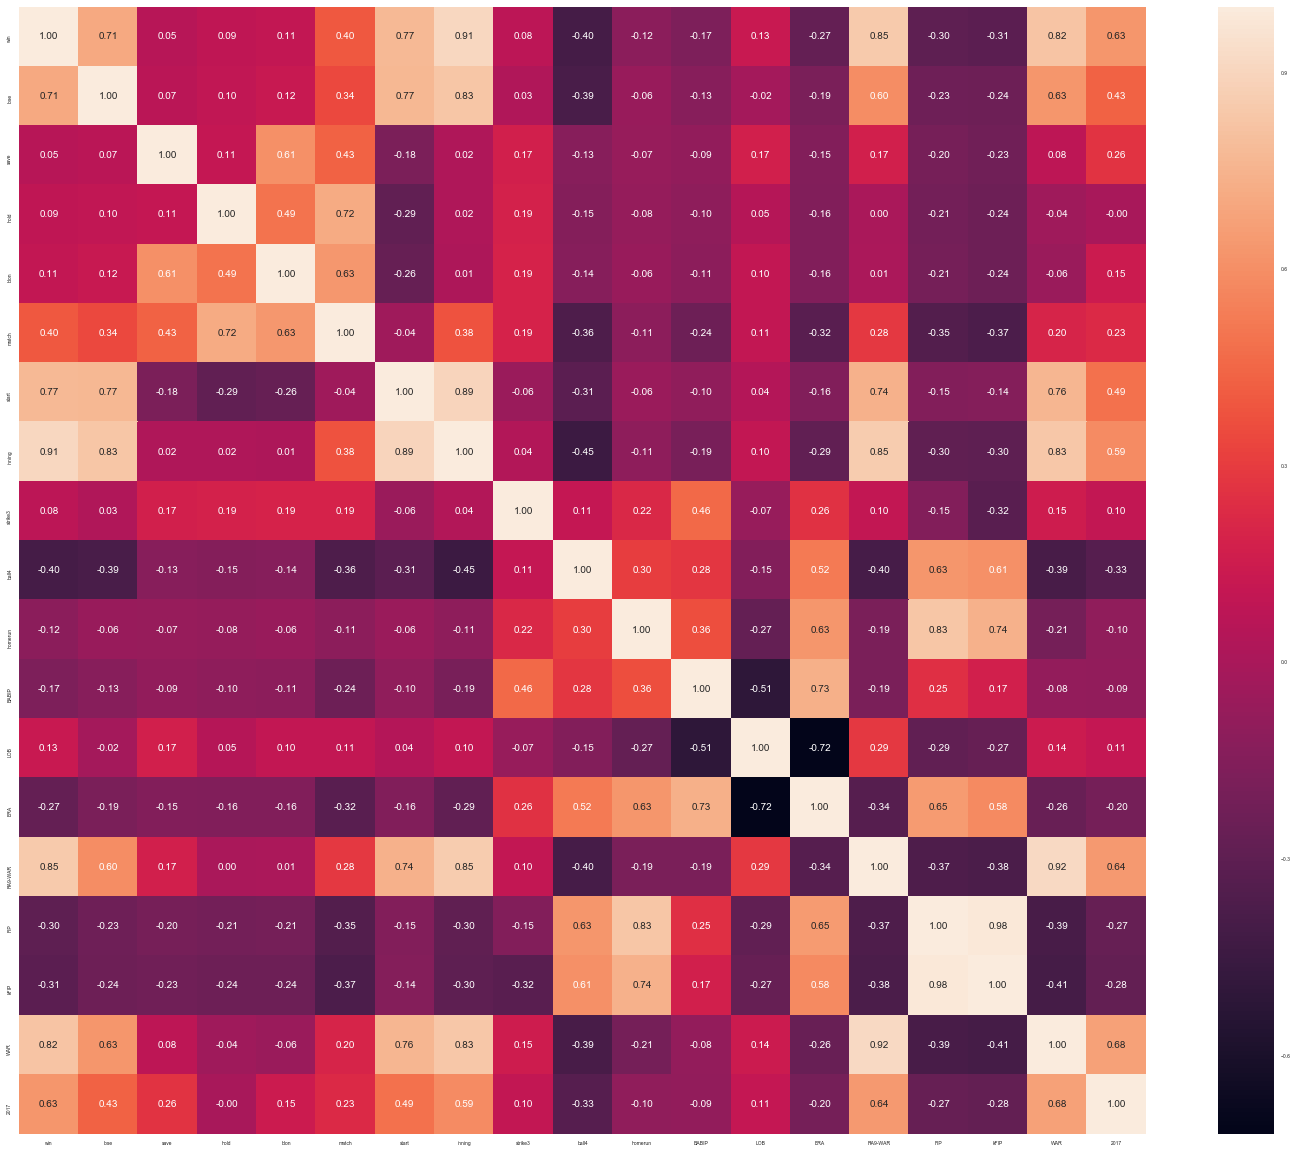

In [32]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothic')
sns.set(font_scale=0.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 10},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

### 위 heatmap에서 win - inning, kFIP-FIP, RA9_WAR-WAR 등의 피처 쌍에서 높은 연관성을 발견할 수 있음.
### [회귀분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인]
#### 회귀 분석은 피처 간의 '독립성'을 전제로 하는 분석 방법이기 때문에 올바른 회귀 분석을 하려면 이러한 피처 쌍을 제거해야함. with 다중 공선성
#### 다중 공선성이란 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것을 의미. 이를 통해 여러 피처 간의 연관성을 고려했을 때 어떤 피처를 제거하는 것이 옳은 판단일지 혹은 제거하는 것 자체가 맞는 판단인지에 대한 기준을 제시해줄 수 있음
#### 다중 공선성은 분산팽창요인(VIF)이라는 계수로 평가할 수 있음. 일반적으로 VIF 계수가 10~15 정도를 넘으면 그 피처는 다중 공선성의 문제가 발생했다고 할 수 있음.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 피처마다의 VIF 계수 출력
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


### 위 실행 결과로 많은 개수의 피처가 다중 공선성 문제를 가진 것을 알 수 있다.

### `[미니 퀴즈 - 3.2]`
- `적절한 피처를 선정하여 다시 학습해 보세요.` 
    - 사용할 피처를 다시 고른 뒤, 다시 학습을 진행했을 때의 Train score, Test score가 어떻게 향상되는지 살펴봅니다.

###  1.  IF 계수가 높은 피처들을 우선적으로 제거 
###  2. 다시 공선성을 검증. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있음. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문
### 3. 여전히 VIF 계수가 높은 피처들을 제거
### 4. 남은 피처를 토대로 다시한번 회귀분석을 실시. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정.
#### train_score, test_score를 비교했을 때, 기존보다 overfit이 비교적 덜 된것으로 보임.
#### test rmse 역시 감소한 것을 볼 수 있음.

### [적절한 피처로 다시 학습하기]


In [73]:
X

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
0,0.016783,-0.587056,-0.971030,0,0,0,0.446615,0,3.174630,1,...,0.672099,2.452068,-0.306452,3.313623,2.734705,2.645175,1.227145,0,-0.585705,-0.442382
1,-0.241686,-0.519855,-1.061888,0,0,1,-0.122764,0,3.114968,0,...,0.134531,2.349505,-0.098502,2.019505,1.337303,2.547755,2.504721,0,-0.585705,-0.668521
2,-0.095595,-0.625456,-0.837415,1,0,0,0.308584,0,2.973948,0,...,0.109775,2.554632,-0.306452,4.348918,5.329881,2.706808,0.907751,0,-0.585705,-0.412886
3,-0.477680,-0.627856,-0.698455,0,0,1,0.558765,0,2.740722,0,...,0.350266,2.246942,-0.306452,1.760682,3.333592,2.350927,1.227145,0,-0.585705,-0.186746
4,-0.196735,-0.539055,-0.612941,0,0,0,0.481122,0,2.751570,0,...,0.155751,2.452068,-0.306452,2.537153,2.734705,2.587518,1.227145,0,-0.585705,-0.294900
5,-0.578820,-0.721456,-0.580874,0,1,0,0.653661,0,2.963100,0,...,0.130995,2.041816,-0.306452,1.243035,0.738417,2.048726,2.185327,0,-0.585705,-0.088425
6,0.241539,-0.231854,-0.869482,0,1,0,-0.338437,0,1.037633,0,...,0.314899,1.836690,-0.306452,1.243035,-0.451371,1.674951,2.824115,0,-0.364245,-0.373557
7,-0.533869,-0.697456,-0.666387,0,0,0,0.627780,0,3.375313,0,...,-0.286327,2.349505,-0.306452,2.795976,3.333592,2.448347,1.865933,0,-0.585705,-0.599696
8,-0.219211,-0.570256,-0.853448,0,0,0,0.394853,0,2.133251,0,...,0.728685,1.836690,-0.306452,1.501858,-0.379505,1.593436,1.546539,0,-0.142784,-0.678353
9,0.140398,-0.457455,-0.457948,1,0,0,0.688169,0,2.496649,0,...,0.092092,2.349505,-0.306452,1.501858,2.135819,2.366832,1.227145,0,-0.585705,-0.088425


In [74]:
# 피처 재선정
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [75]:
X

,FIP,WAR,볼넷/9,삼진/9,연봉(2017)
0,-0.971030,4.503142,-0.869000,0.672099,2.734705
1,-1.061888,4.094734,-0.987502,0.134531,1.337303
2,-0.837415,3.761956,-0.885929,0.109775,5.329881
3,-0.698455,2.998081,-0.945180,0.350266,3.333592
4,-0.612941,2.809003,-0.877464,0.155751,2.734705
5,-0.580874,2.476226,-1.034057,0.130995,0.738417
6,-0.869482,2.423284,-1.338778,0.314899,-0.451371
7,-0.666387,2.408158,-0.691246,-0.286327,3.333592
8,-0.853448,2.355216,0.002840,0.728685,-0.379505
9,-0.457948,2.249332,-0.928251,0.092092,2.135819


In [76]:
#모델 학습
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [77]:
print(model.score(X_train, y_train)) # train R2 score 출력
print(model.score(X_test, y_test)) # test R2 score 출력

0.9150591192570362
0.9038759653889862


In [78]:
# 회귀 분석 모델을 평가
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score 출력
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score 출력

7893.462873347692
13141.866063591096


In [79]:
# 피처마다의 VIF 계수 출력
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


# <Step4. 시각화> : 분석 결과의 시각화

### [예상 연봉과 실제 연봉 비교]

### 다음의 코드는 회귀 분석 모델의 predict()함수를 사용하여 2018년의 연봉을 예측하고, 이를 원래의 데이터 프레임에 '예측연봉'이라는 새로운 열로 합치는 과정이다.
### 단, 데이터 프레임을 생성할 때 한 가지 추가된 조건은 '재계약하여 연봉이 변화한 선수만을 대상으로 한다.'는 조건이다. 재계약하지 않은 선수는 예측의 의미가 없기 때문

In [125]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
X.transpose()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
FIP,-0.971030,-1.061888,-0.837415,-0.698455,-0.612941,-0.580874,-0.869482,-0.666387,-0.853448,-0.457948,...,0.423911,0.429256,1.412663,1.348527,0.439945,0.375810,0.482702,1.348527,0.728554,1.118709
WAR,4.503142,4.094734,3.761956,2.998081,2.809003,2.476226,2.423284,2.408158,2.355216,2.249332,...,-0.791043,-0.813732,-0.821295,-0.836422,-0.851548,-0.859111,-0.874237,-0.964995,-1.033063,-1.267520
볼넷/9,-0.869000,-0.987502,-0.885929,-0.945180,-0.877464,-1.034057,-1.338778,-0.691246,0.002840,-0.928251,...,-0.763194,-0.327274,1.179401,0.874680,-0.323042,-0.373829,0.603817,0.307561,1.196330,0.722320
삼진/9,0.672099,0.134531,0.109775,0.350266,0.155751,0.130995,0.314899,-0.286327,0.728685,0.092092,...,-0.151935,-0.682430,-0.848651,0.021359,-0.661210,-0.968896,-0.777918,-0.756699,0.205264,-0.449012
연봉(2017),2.734705,1.337303,5.329881,3.333592,2.734705,0.738417,-0.451371,3.333592,-0.379505,2.135819,...,-0.259728,-0.100025,-0.527230,-0.411446,-0.359542,-0.335587,-0.535215,-0.020173,-0.543201,-0.539208


In [119]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [84]:
# 원래의 데이터 프레임을 다시 로드
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]
picher.head()

,선수명,연봉(2017)
0,켈리,85000
1,소사,50000
2,양현종,150000
3,차우찬,100000
4,레일리,85000


In [85]:
#원래의 데이터 프레임에 2018년 연봉 정보를 합친다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'],axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명','y','예측연봉(2018)','연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

In [87]:
result_df.head()

,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,양현종,230000,163930.148696,150000
1,켈리,140000,120122.822204,85000
2,소사,120000,88127.019455,50000
3,정우람,120000,108489.464585,120000
4,레일리,111000,102253.697589,85000


In [98]:
#재계약하여 연봉이 변화한 선수만 대상으로 관찰
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
# result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,level_0,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,0,양현종,230000,163930.148696,150000
1,1,1,켈리,140000,120122.822204,85000
2,2,2,소사,120000,88127.019455,50000
3,3,4,레일리,111000,102253.697589,85000
4,4,7,피어밴드,85000,58975.725734,35000
5,5,13,배영수,50000,56873.662417,55000
6,6,21,안영명,35000,22420.790838,20000
7,7,22,채병용,30000,21178.955105,25000
8,8,23,류제국,29000,45122.360087,35000
9,9,24,박정진,25000,29060.748299,33000


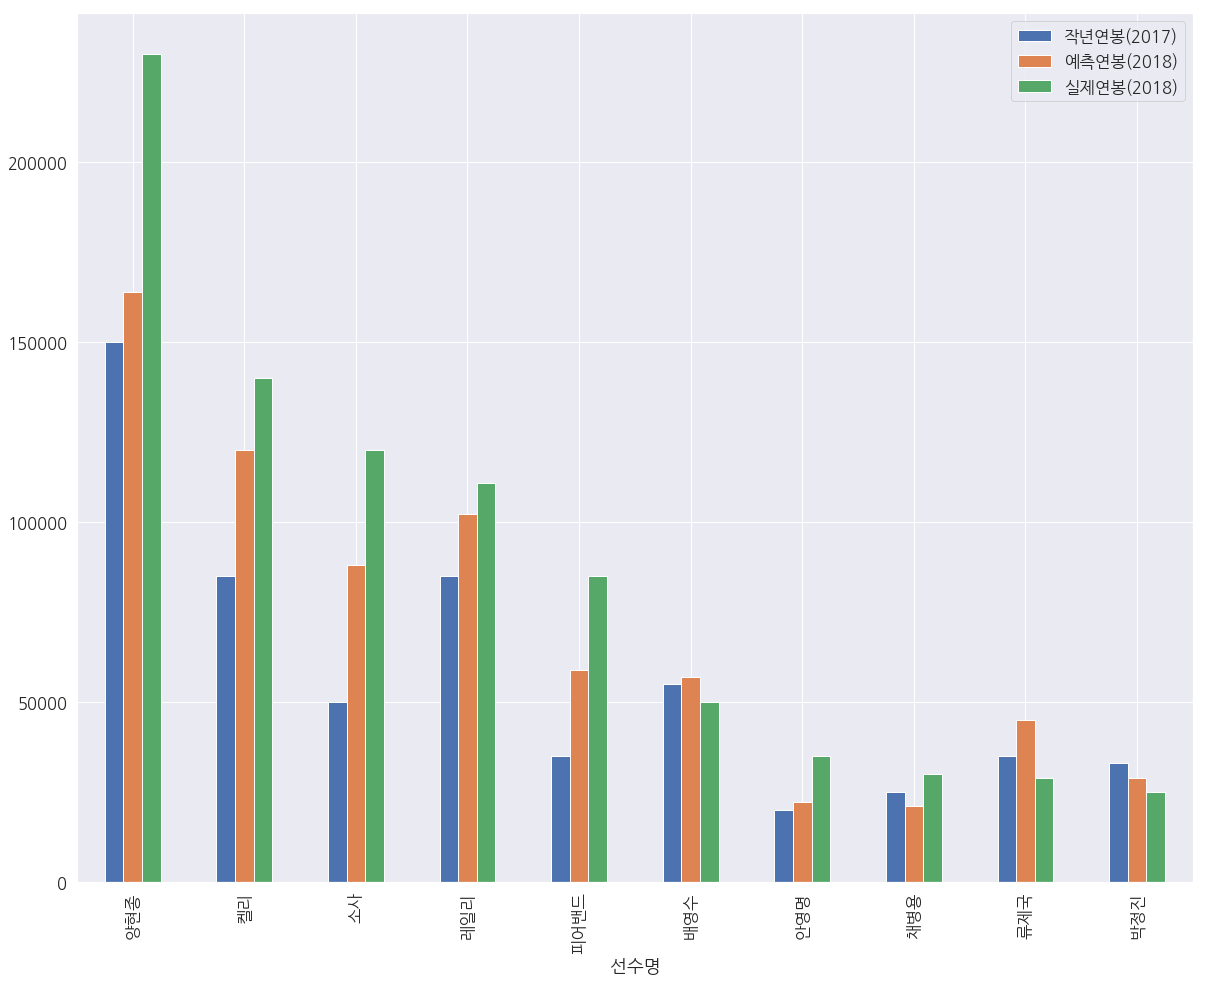

In [99]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력
mpl.rc('font', family='NanumGothic')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")